# Материалы семинара по линейной регрессии

In [2]:
import numpy as np
import sklearn.datasets

In [3]:
X, y, coef = sklearn.datasets.make_regression(n_samples=100, n_features=2, n_informative=1, 
                                              bias=1000, noise=10, coef=True)

Функция генерирует вектор весов и матрицу объектов, затем умножаем матрицу на вектор и накладывает шум на получившиеся ответы.

Параметры:
* n_samples: число объектов (l)
* n_features: число признаков (d)
* n_informative: число ненулевых весов
* bias: $w_0$
* noise: разброс шума
* coef: возвращать или нет вектор весов   


Это пример того, как может работать функция make_regression (в sklearn реализация может отличаться в каких-то деталях):

In [4]:
def make_regression(n_samples=100, n_features=2, n_informative=1, 
                    bias=1000, noise=10, coef=True):
    w = np.random.rand(n_features)
    X = np.random.rand(n_samples, n_features)
    y_clear = np.dot(X, w)
    y_noise = np.random.normal(0, noise, size=n_samples)
    y = y_clear + y_noise
    return X, y, w

In [7]:
coef

array([  0.        ,  34.66775291])

Визуализируем выборку:

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

Изобразим зависимость y от первого признака (раз коэффициент при нем нулевой, то зависимости не должно быть):

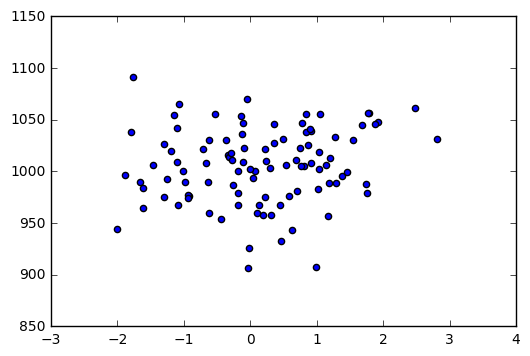

In [6]:
plt.scatter(X[:, 0], y)

Зависимость y от второго признака:

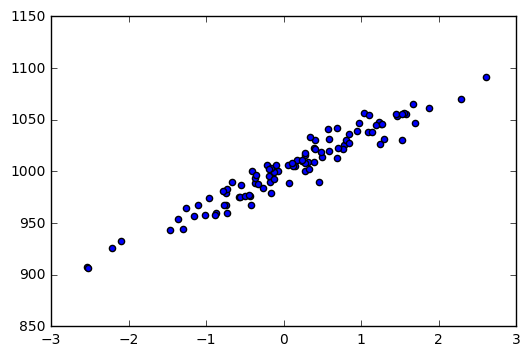

In [8]:
plt.scatter(X[:, 1], y)

Обучение линейной модели:

In [9]:
import sklearn.linear_model

In [10]:
reg = sklearn.linear_model.LinearRegression()
reg.coef_   # пока модели не дали данные, никаких коэффициенов нет

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [11]:
reg.fit(X, y)
reg.coef_   # коэффициенты похожи на настоящие

array([  1.18629356,  35.04794213])

Нарисуем второй признак и прямую, которую мы обучили:

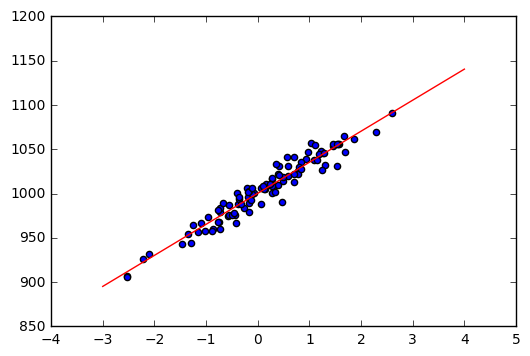

In [13]:
plt.scatter(X[:, 1], y)
grid = np.linspace(-3, 4, 1000) # массив 1000 точек от -3 до 4
y_grid = reg.coef_[1]*grid + reg.intercept_   # ответы на этих объектах
plt.plot(grid, y_grid, color="red")

А теперь если считать $w_0=0$ (не оптимизировать по нему):

In [16]:
reg = sklearn.linear_model.LinearRegression(fit_intercept=False)
reg.fit(X, y)
reg.coef_

array([ 106.0916869 ,  161.00469828])

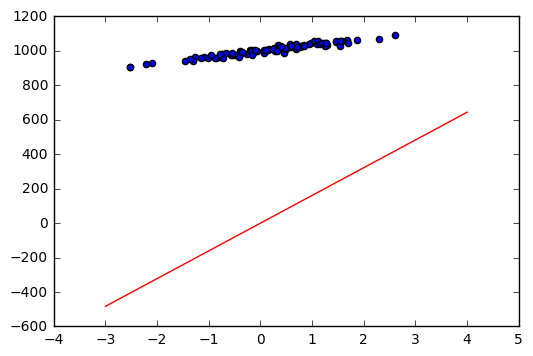

In [17]:
plt.scatter(X[:, 1], y)
grid = np.linspace(-3, 4, 1000) # массив 1000 точек от -3 до 4
y_grid = reg.coef_[1]*grid + reg.intercept_   # ответы на этих объектах
plt.plot(grid, y_grid, color="red")

В этом случае прямая обязательно должна проходить через точку (0, 0), и алгоритм нашел лучшую такую прямую. Впрочем, она далека от идеала, потому что в нашей модели сдвиг присутствует (bias=1000 в первой ячейке).